In [15]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
class SIRModel():
    """
    Cette classe représente une modélisation SIR épidémiologique.
    Les paramètres du modèles sont beta et gamma dont les valeurs initiales sont données à
    l'instanciation de la classe.
    
    beta = taux de contact (vitesse de la propagation de la maladie)
    gamma = moyenne de temps de guérison (vitesse de guérison de la maladie)
    """
    def __init__(self, beta_init=0.1, gamma_init=0.3):
        self.beta_0 = beta_init
        self.gamma_0 = gamma_init
        self.beta_ = None
        self.gamma_ = None


    def fit(self, X, y):
        """
        Ajuste les paramètres beta et gamma du modèle sur le jeu de données d'entrée.
        
        Returns:
            self for method chaining.
        """
        self.beta_ = self.beta_0
        self.gamma_ = self.gamma_0
        return self


    def predict(self, t):
        """
        Predict the S I R values for given time
        TODO : defines values
        """
        if self.beta_ is None or self.gamma_ is None:
            raise Exception("SIRModel not fitted")
        return S, I, R
    
    
    def deriv(self, y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

In [19]:
df = pd.read_csv("data/covid/france/hospitalisations/donnees-hospitalieres-covid19-2020-05-05-19h00.csv", sep=";")

In [24]:
cas_france_par_jour = df[df["sexe"] == 0][["jour", "hosp", "rea", "rad", "dc"]].groupby("jour").sum()
cas_france_par_jour.tail()

,hosp,rea,rad,dc
jour,,,,
2020-05-01,25809,3819,50204,15350
2020-05-02,25751,3770,50554,15468
2020-05-03,25739,3762,50776,15564
2020-05-04,25472,3639,51363,15807
2020-05-05,24701,3375,52728,16041


Données covid France par https://www.gouvernement.fr/info-coronavirus/carte-et-donnees rapportées par google (daté du 6 mai)
![données covid](https://i.gyazo.com/c34aad6a5535bd5589ceec964a1480e3.png)

On retrouve le même nombre de guérison. On observe cependant une différence notable entre les nombres de décès. Pour les "cas confirmés", on ne peut pas le comparer au nombre d'hospitalisations et de retour au domicile.

On estime finalement le nombre d'infections avec le nombre d'hospitalisations et de réanimation. On note déjà des problèmes avec cette modélisation:
- Des gens peuvent être infectés sans avoir été testés
- Les gens hospitalisés ne seront a priori pas en contact avec la grande partie de la population
- L'immunisation des guéris du covid n'est pas encore connue

Néanmoins il doit rester possible d'ajuster les paramètres SIR à l'évolution actuelle du nombre d'infectés.

In [26]:
cas_france_par_jour["infectés"] = cas_france_par_jour["hosp"] + cas_france_par_jour["rea"]
cas_france_par_jour.head()

,hosp,rea,rad,dc,infectés
jour,,,,,
2020-03-18,2972,771,816,218,3743
2020-03-19,4073,1002,1180,327,5075
2020-03-20,5226,1297,1587,450,6523
2020-03-21,5900,1453,1811,525,7353
2020-03-22,6954,1674,2117,632,8628


Text(0.5, 1.0, "évolution du nombre d'hospitalisations en France")

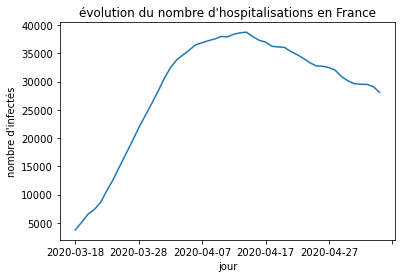

In [29]:
cas_france_par_jour["infectés"].plot()
plt.ylabel("nombre d'infectés")
plt.title("évolution du nombre d'hospitalisations en France")

On voit que le nombre d'hospitalisations a commencé à baisser à partir de de mi avril. La courbe des hospitalisations ne peut donc pas être correctement utilisée comme une courbe du nombre d'infectés (cela impliquerait que la France soit déjà en stade de fin d'épidémie). Ce jeu de données n'est pas adapté pour une modélisation SIR.

(Il est technique possible de fitter un modèle SIR sur cette courbe, cela dit, bien que cela n'ait pas de pertinence particulière).

In [30]:
# work in progress :)